# <font color='red'>Análise Risco de Inadimplência - Data Science Test</font>



In [1]:
# Importando pacotes e bibliotecas
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_validate,train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Configurando o notebook
sns.set()
%matplotlib inline

### <font color='black'>- Análise exploratória descritiva e tratamento dos dados</font> 

In [2]:
#Carregando o dataframe
df = pd.read_csv('data_test_DS.csv')
df

,Nº do cliente,Safra,Estado,Renda Mensal,Endividamento,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,Performance 30D3M EVER,Performance 60D6M EVER,Performance 60D9M EVER,Performance 90D9M EVER,Performance 90D12M EVER
0,6.325851e+08,2020-05-01 00:00:00 UTC,MS,1076.0,26 a 50%,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,BOM,MAU,MAU,MAU,MAU
1,1.190978e+09,2020-05-01 00:00:00 UTC,MG,12709.0,Até 25%,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,BOM,BOM,BOM,BOM,BOM
2,1.089165e+09,2020-06-01 00:00:00 UTC,MS,2518.0,Acima de 100%,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,BOM,BOM,BOM,BOM,BOM
3,1.342327e+08,2020-05-01 00:00:00 UTC,RS,1090.0,Até 25%,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,MAU,BOM,MAU,BOM,MAU
4,1.055186e+09,2020-10-01 00:00:00 UTC,RJ,1155.0,Até 25%,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,BOM,BOM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### - Da forma como está nomeada as colunas, não será possível manipulá - las, por isso, vamos renomeá - las.

In [3]:
#Renomeando as colunas, para melhor manipula-las
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,nº_do_cliente,safra,estado,renda_mensal,endividamento,quantidade_de_cheques_sem_fundo,quantidade_de_restritivos,valor_dos_restritivos,quantidade_de_protestos,valor_dos_protestos,modelo_score_1,modelo_score_2,modelo_score_3,modelo_score_4,performance_30d3m_ever,performance_60d6m_ever,performance_60d9m_ever,performance_90d9m_ever,performance_90d12m_ever
0,6.325851e+08,2020-05-01 00:00:00 UTC,MS,1076.0,26 a 50%,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,BOM,MAU,MAU,MAU,MAU
1,1.190978e+09,2020-05-01 00:00:00 UTC,MG,12709.0,Até 25%,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,BOM,BOM,BOM,BOM,BOM
2,1.089165e+09,2020-06-01 00:00:00 UTC,MS,2518.0,Acima de 100%,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,BOM,BOM,BOM,BOM,BOM
3,1.342327e+08,2020-05-01 00:00:00 UTC,RS,1090.0,Até 25%,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,MAU,BOM,MAU,BOM,MAU
4,1.055186e+09,2020-10-01 00:00:00 UTC,RJ,1155.0,Até 25%,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,BOM,BOM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### - Vamos verificar quais os tipos de dados que contém o dataframe.

In [4]:
#Informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994 entries, 0 to 11993
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   nº_do_cliente                    10000 non-null  float64
 1   safra                            10000 non-null  object 
 2   estado                           10000 non-null  object 
 3   renda_mensal                     10000 non-null  float64
 4   endividamento                    10000 non-null  object 
 5   quantidade_de_cheques_sem_fundo  10000 non-null  float64
 6   quantidade_de_restritivos        10000 non-null  float64
 7   valor_dos_restritivos            10000 non-null  float64
 8   quantidade_de_protestos          10000 non-null  float64
 9   valor_dos_protestos              10000 non-null  float64
 10  modelo_score_1                   10000 non-null  float64
 11  modelo_score_2                   10000 non-null  float64
 12  modelo_score_3    

In [5]:
#Porcentagem de dados ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

performance_90d12m_ever            66.691679
performance_90d9m_ever             30.506920
performance_60d9m_ever             30.506920
modelo_score_1                     16.624979
performance_60d6m_ever             16.624979
performance_30d3m_ever             16.624979
modelo_score_4                     16.624979
modelo_score_3                     16.624979
modelo_score_2                     16.624979
nº_do_cliente                      16.624979
safra                              16.624979
quantidade_de_protestos            16.624979
valor_dos_restritivos              16.624979
quantidade_de_restritivos          16.624979
quantidade_de_cheques_sem_fundo    16.624979
endividamento                      16.624979
renda_mensal                       16.624979
estado                             16.624979
valor_dos_protestos                16.624979
dtype: float64

#### <font color='black'> - A variável alvo é o "Endividamento", onde o tipo dos dados estão na forma de objetos. Nota-se que o Dataframe é composto por 11994 linhas e 19 colunas. Além disso, percebemos que existem vários dados ausentes, o que dificulta a análise. </font> 
    
#### <font color='black'> Vamos verificar a quantidade de dados ausentes por coluna. </font> 

In [6]:
df.isnull().sum().sort_values(ascending=False)

performance_90d12m_ever            7999
performance_90d9m_ever             3659
performance_60d9m_ever             3659
modelo_score_1                     1994
performance_60d6m_ever             1994
performance_30d3m_ever             1994
modelo_score_4                     1994
modelo_score_3                     1994
modelo_score_2                     1994
nº_do_cliente                      1994
safra                              1994
quantidade_de_protestos            1994
valor_dos_restritivos              1994
quantidade_de_restritivos          1994
quantidade_de_cheques_sem_fundo    1994
endividamento                      1994
renda_mensal                       1994
estado                             1994
valor_dos_protestos                1994
dtype: int64

#### <font color='black'> - Percebe-se que, temos 1994 números de clientes ausentes e essa mesma quantidade se estende para outras colunas do dataframe.  </font> 
    
#### <font color='black'> Vamos fazer a limpeza das linhas com clientes ausentes e verificar a quantidade de dados de antes e depois da limpeza </font> 

In [7]:
#antes
shape_antes = df.shape
print("Antes:\t", shape_antes)

#limpeza
df.dropna(subset=['nº_do_cliente'], inplace=True)

#depois
shape_depois = df.shape
print("Depois:\t", shape_depois)

Antes:	 (11994, 19)
Depois:	 (10000, 19)


In [8]:
#Nova base de dados após limpeza e tratamento
df

,nº_do_cliente,safra,estado,renda_mensal,endividamento,quantidade_de_cheques_sem_fundo,quantidade_de_restritivos,valor_dos_restritivos,quantidade_de_protestos,valor_dos_protestos,modelo_score_1,modelo_score_2,modelo_score_3,modelo_score_4,performance_30d3m_ever,performance_60d6m_ever,performance_60d9m_ever,performance_90d9m_ever,performance_90d12m_ever
0,6.325851e+08,2020-05-01 00:00:00 UTC,MS,1076.0,26 a 50%,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,BOM,MAU,MAU,MAU,MAU
1,1.190978e+09,2020-05-01 00:00:00 UTC,MG,12709.0,Até 25%,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,BOM,BOM,BOM,BOM,BOM
2,1.089165e+09,2020-06-01 00:00:00 UTC,MS,2518.0,Acima de 100%,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,BOM,BOM,BOM,BOM,BOM
3,1.342327e+08,2020-05-01 00:00:00 UTC,RS,1090.0,Até 25%,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,MAU,BOM,MAU,BOM,MAU
4,1.055186e+09,2020-10-01 00:00:00 UTC,RJ,1155.0,Até 25%,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,BOM,BOM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6.965247e+06,2020-07-01 00:00:00 UTC,MS,4281.0,Até 25%,0.0,0.0,0.0,0.0,0.0,574.0,614.0,418.0,761.0,MAU,MAU,MAU,MAU,NaN
9996,3.511353e+08,2020-07-01 00:00:00 UTC,MG,4274.0,Até 25%,0.0,2.0,352.0,0.0,0.0,126.0,213.0,243.0,531.0,BOM,BOM,BOM,BOM,NaN
9997,7.839663e+08,2020-05-01 00:00:00 UTC,RS,3365.0,Até 25%,0.0,0.0,0.0,0.0,0.0,627.0,649.0,491.0,655.0,BOM,BOM,BOM,BOM,BOM
9998,4.603782e+08,2020-06-01 00:00:00 UTC,SC,2393.0,Até 25%,0.0,0.0,0.0,0.0,0.0,605.0,658.0,740.0,892.0,BOM,BOM,BOM,BOM,BOM


#### - Após a limpeza, vamos verificar se ainda existem dados ausentes, para escolher quais dos atributos usaremos para a análise

In [9]:
#Porcentagem de dados ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

performance_90d12m_ever            66.46
performance_90d9m_ever             16.65
performance_60d9m_ever             16.65
modelo_score_1                      0.00
performance_60d6m_ever              0.00
performance_30d3m_ever              0.00
modelo_score_4                      0.00
modelo_score_3                      0.00
modelo_score_2                      0.00
nº_do_cliente                       0.00
safra                               0.00
quantidade_de_protestos             0.00
valor_dos_restritivos               0.00
quantidade_de_restritivos           0.00
quantidade_de_cheques_sem_fundo     0.00
endividamento                       0.00
renda_mensal                        0.00
estado                              0.00
valor_dos_protestos                 0.00
dtype: float64

#### <font color='black'> - Após a limpeza dos dados, temos 10000 linhas que correspondem aos clientes que queremos analisar. Notamos que, as três últimas colunas ainda possuem dados ausentes, principalmente a última, com 66,46% de ausência de dados. Com base nisso, usaremos os modelos de score para fazer a análise dos dados.</font> 
   

#### <font color='black'> Seguindo, temos uma análise dos dados, baseada no endividamento dos clientes e na renda mensal. Temos também, uma contagem da quantidade de clientes dentro de cada faixa de endividamento. </font> 

In [10]:
df.groupby(['endividamento'])['renda_mensal'].agg(['max','min','mean','median'])

,max,min,mean,median
endividamento,,,,
26 a 50%,9598.0,1041.0,2573.393365,2518.0
51 a 75%,7920.0,1042.0,2742.282230,3303.0
76 a 100%,7998.0,1044.0,2669.336957,3306.0
Acima de 100%,14457.0,1041.0,2877.179793,3303.0
Até 25%,33564.0,1041.0,2779.716815,3365.0


In [11]:
df_group = df.groupby(['endividamento'])['renda_mensal'].count()
df_group

endividamento
26 a 50%          422
51 a 75%          287
76 a 100%         184
Acima de 100%    1257
Até 25%          7850
Name: renda_mensal, dtype: int64

#### - Após a análise, percebemos que a média e a mediana das faixas de endivamento estão bem próximas. Com isso, vamos reduzir o dataframe para melhor analisarmos.

In [12]:
#Resumindo a base de dados para busca de resultados
ndf = df[['renda_mensal','endividamento','modelo_score_1', 'modelo_score_2', 'modelo_score_3','modelo_score_4']]
ndf

,renda_mensal,endividamento,modelo_score_1,modelo_score_2,modelo_score_3,modelo_score_4
0,1076.0,26 a 50%,141.0,236.0,196.0,405.0
1,12709.0,Até 25%,767.0,646.0,805.0,946.0
2,2518.0,Acima de 100%,67.0,238.0,196.0,563.0
3,1090.0,Até 25%,245.0,523.0,290.0,698.0
4,1155.0,Até 25%,697.0,718.0,645.0,816.0
...,...,...,...,...,...,...
9995,4281.0,Até 25%,574.0,614.0,418.0,761.0
9996,4274.0,Até 25%,126.0,213.0,243.0,531.0
9997,3365.0,Até 25%,627.0,649.0,491.0,655.0
9998,2393.0,Até 25%,605.0,658.0,740.0,892.0


#### - A coluna "Endividamento",que é o nosso alvo de estudo, possui dados em forma de objetos, os quais não são possíveis ser manipulados de forma eficaz, com isso, faremos uma transformação dos intervalos de endividamento em forma de linhas, para colunas com dados numéricos na forma binária.

In [13]:
ndf2 = pd.get_dummies(ndf, prefix = 'endividamento', sparse = False , drop_first = False , dtype = None )
ndf2

,renda_mensal,modelo_score_1,modelo_score_2,modelo_score_3,modelo_score_4,endividamento_26 a 50%,endividamento_51 a 75%,endividamento_76 a 100%,endividamento_Acima de 100%,endividamento_Até 25%
0,1076.0,141.0,236.0,196.0,405.0,1,0,0,0,0
1,12709.0,767.0,646.0,805.0,946.0,0,0,0,0,1
2,2518.0,67.0,238.0,196.0,563.0,0,0,0,1,0
3,1090.0,245.0,523.0,290.0,698.0,0,0,0,0,1
4,1155.0,697.0,718.0,645.0,816.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,4281.0,574.0,614.0,418.0,761.0,0,0,0,0,1
9996,4274.0,126.0,213.0,243.0,531.0,0,0,0,0,1
9997,3365.0,627.0,649.0,491.0,655.0,0,0,0,0,1
9998,2393.0,605.0,658.0,740.0,892.0,0,0,0,0,1


#### - Novamente, renomeamos as novas colunas, para melhor manipulá - las.

In [14]:
#Renomeando as colunas, para melhor manipula-las
ndf2.columns = ndf2.columns.str.lower().str.replace(' ', '_')
ndf2

,renda_mensal,modelo_score_1,modelo_score_2,modelo_score_3,modelo_score_4,endividamento_26_a_50%,endividamento_51_a_75%,endividamento_76_a_100%,endividamento_acima_de_100%,endividamento_até_25%
0,1076.0,141.0,236.0,196.0,405.0,1,0,0,0,0
1,12709.0,767.0,646.0,805.0,946.0,0,0,0,0,1
2,2518.0,67.0,238.0,196.0,563.0,0,0,0,1,0
3,1090.0,245.0,523.0,290.0,698.0,0,0,0,0,1
4,1155.0,697.0,718.0,645.0,816.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,4281.0,574.0,614.0,418.0,761.0,0,0,0,0,1
9996,4274.0,126.0,213.0,243.0,531.0,0,0,0,0,1
9997,3365.0,627.0,649.0,491.0,655.0,0,0,0,0,1
9998,2393.0,605.0,658.0,740.0,892.0,0,0,0,0,1


## - Modelo de Machine Learning

#### - Iniciando aqui o nosso modelo de regressão, faremos uma correlação para analisar a melhor relação entre a renda mensal e os modelos de score apresentados.

<AxesSubplot:>

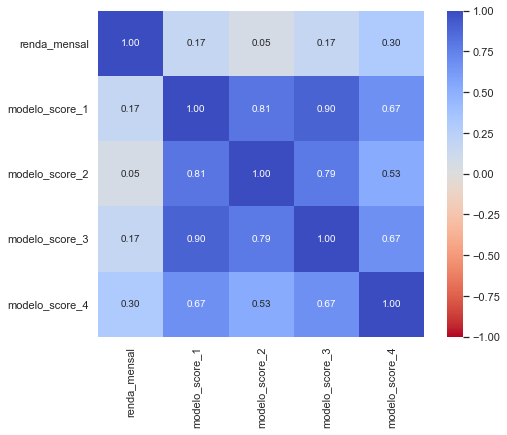

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

corr = ndf.select_dtypes(include=np.number).corr()
# mask = np.zeros_like(corr).diagonal()
# mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr, annot=True, fmt=".2f", ax=ax, square=True, cmap="coolwarm_r", vmin=-1, vmax=1
)
# ax.tick_params(colors="white")
# ax.collections[0].colorbar.ax.tick_params(colors="white")

#### - A melhor relação encontrada é com o Modelo de Score 4. Assim, montaremos uma nova tabela, apenas com as colunas que serão usadas na regressão.

In [16]:
df_mod = ndf2[['renda_mensal', 'modelo_score_4',
             'endividamento_26_a_50%',
             'endividamento_51_a_75%',
             'endividamento_76_a_100%',
             'endividamento_acima_de_100%',
             'endividamento_até_25%']]
df_mod

,renda_mensal,modelo_score_4,endividamento_26_a_50%,endividamento_51_a_75%,endividamento_76_a_100%,endividamento_acima_de_100%,endividamento_até_25%
0,1076.0,405.0,1,0,0,0,0
1,12709.0,946.0,0,0,0,0,1
2,2518.0,563.0,0,0,0,1,0
3,1090.0,698.0,0,0,0,0,1
4,1155.0,816.0,0,0,0,0,1
...,...,...,...,...,...,...,...
9995,4281.0,761.0,0,0,0,0,1
9996,4274.0,531.0,0,0,0,0,1
9997,3365.0,655.0,0,0,0,0,1
9998,2393.0,892.0,0,0,0,0,1


#### - Como foi mostrado, temos cinco faixas de endividamento, associadas a renda mensal, a seguir foram feitas uma regressão para cada faixa, plotado a matriz de confusão e testado a acurácia para cada uma delas.

Accuracy:  0.7944


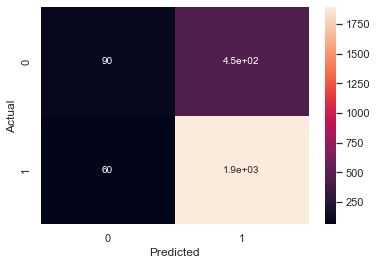

In [17]:
X = df_mod[['renda_mensal','modelo_score_4']]
y = df_mod['endividamento_até_25%']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9612


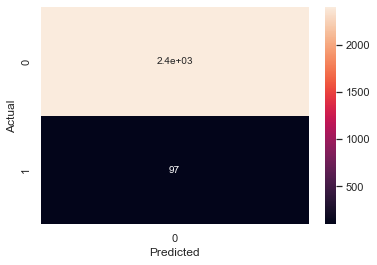

In [18]:
X = df_mod[['renda_mensal','modelo_score_4']]
y = df_mod['endividamento_26_a_50%']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.968


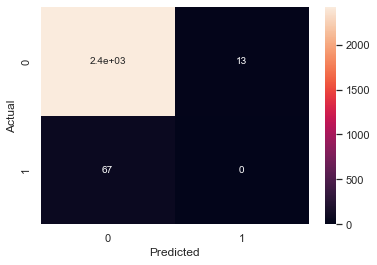

In [19]:
X = df_mod[['renda_mensal','modelo_score_4']]
y = df_mod['endividamento_51_a_75%']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9828


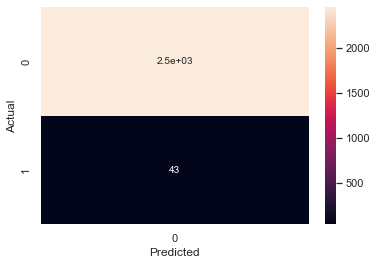

In [20]:
X = df_mod[['renda_mensal','modelo_score_4']]
y = df_mod['endividamento_76_a_100%']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8604


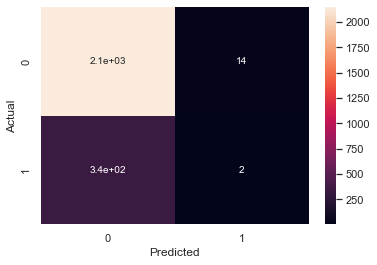

In [21]:
X = df_mod[['renda_mensal','modelo_score_4']]
y = df_mod['endividamento_acima_de_100%']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()